The purpose of this Notebook is, from the Tech Careers Report 2021 of Landing Jobs, try to identify a group of professionals with a potential risk of career migration within the technological area, considering:

1. Raw_Dataset's average age increased by 20 years.
2. Attempted carreer migration via jobs site.
3. The implicit risk in the analysis of the profile, for the potential candidate to do a Career Migration, through a Machine Learning Model.


As a Case Study, let's assume that one Job Site take the Raw Data of Tech Careers Report 2021 and their Machine Learning Engineers built a Machine Learning Model  considering the features of the Raw Data as a ideal profile for hiring candidates.


For this analysis, we will create a subset with the tech professionals. The average age of this subset will be increased by 20 years to have a dataset for professionals above this value (the average plus 20).


A Machine Learning model could have bias and when identifying possible outliers within a dataset. We know that a ML model could avoid the outliers, consequently eliminating a candidate (tech professional) from the hiring process.


It will be open for future debate, perhaps carried out by Landing Jobs, to determine what is the risk for a tech professional over 20 years above of the average age attempting a migration process, or relocation, within the technological area itself, through the Machine Learning models currently used for CV analysis, by the Jobs Sites.



In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#downloading the raw dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LET'S TAKE A LOOK AND DOING SOME EXPLORATORY DATA ANALYSIS THROUGH VISUALIZATION AT RAW DATASET**

In [ ]:
#reading the dataset
raw = pd.read_excel('/content/Raw Data.xlsx')
#raw.reset_index(inplace = True)
raw.head()


,ID,Employment_Status,Employment_Status_Aggregated,Work_as_Contractor_12m,Work_as_Perm,Residence_Country,Residence_District,Residence_District_Aggregated,Work_Company_Country,Work_Company_Continent,Work_Company_PT_International,Work_Company_PT_District,Work_Company_PT_District_Aggregated,Remote_Working_Current,Remote_Working_Current_Flexible_Office_Days,Remote_Working_due_to_Covid,Job_Remote_or_Office,Remote_Work_Opinion,Job_Role_Original,Job_Role_Other,Job_Role,Employer_Industry,Employer_Industry_Other,Employer_Org_Type,Employer_Org_Type_Other,Employer_Size,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,Language_Ruby,Language_Swift,Language_Objective-C,Language_VB.NET,...,Perm_GAS_High_Limit,Avg_Salary,Salary_Change,Salary_Fairness,Changing_Jobs_next_6_months,Job_Motivator_Work_life_balance,Job_Motivator_Compensation_and_benefits,Job_Motivator_Training/Development_programs_at_work,Job_Motivator_Career_growth_opportunities,Job_Motivator_Remote_working,Job_Motivator_Flexible_schedule,Job_Motivator_Company_culture,Job_Motivator_The_technologies_I'm_working_with,Job_Motivator_Versatility/Variety_of_projects,Job_Motivator_Freedom_to_choose_the_clients_and/or_projects,Job_Motivator_Being_autonomous_at_work,Job_Motivator_How_widely_used_or_impactful_the_product/service_I_work_on_is,Job_Motivator_Environmentally_friendly/responsible_work_practice,Job_Perk_Meals_allowance/Company_provided_meals_or_snacks,Job_Perk_Transportation_benefit,Job_Perk_Health_benefits,Job_Perk_Fitness_or_wellness_benefit_(ex._gym_membership),Job_Perk_Computer/_Office_equipment_allowance,Job_Perk_Professional_development_sponsorship,Job_Perk_Annual_bonus,Job_Perk_Long-term_leave,Job_Perk_Parental_leave,Job_Perk_Stock_options_or_shares,Job_Perk_Education_sponsorship,Job_Perk_Child_care,Citizenship,Birth_Year,Age,Gender,English_Level,Way_Into_Tech,Way_Into_Tech_Other,Education_Level,Working_Experience,Working_Experience_Aggregated
0,1,Employed full-time,Permanent Employee,1.0,NaN,Portugal,Santarém,Centre,Portugal,Europe,Portugal,Lisboa,Lisbon Metropolitan Area,"Yes, fully remote",NaN,Working remote because of Covid-19,Full Office Job,6.0,Technical Team Leader,NaN,Technical Team Leader,Financial and banking,NaN,Corporate,NaN,1000 - 4.999 employees,NaN,NaN,SQL,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35000.0,32500,Hasn't changed,4,4.0,6,7,6,7,7,7,4,4,5,1,4,5,5,1,7,7,3,7,4,5,4,6,2,7,7,Portuguese,1984.0,37.0,Male,Full professional proficiency,University,NaN,NaN,More than 9 years,6+ years
1,2,Employed full-time,Permanent Employee,0.0,NaN,Portugal,Coimbra,Centre,Portugal,Europe,Portugal,Coimbra,Centre,"Yes, fully remote",NaN,Working remote because of Covid-19,Full Office Job,7.0,Full-Stack Developer,NaN,Full-Stack Developer,Software development - other,NaN,SME - Small or Medium Enterprise (personnel <250),NaN,Less than 10 employees,JavaScript,NaN,SQL,NaN,NaN,NaN,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15000.0,12500,Hasn't changed,4,3.0,5,6,5,6,7,7,6,6,6,4,5,3,4,4,4,6,4,7,6,6,5,6,3,6,5,Portuguese,1976.0,45.0,Male,Full professional proficiency,Self-taught,NaN,NaN,More than 9 years,6+ years
2,3,Working as a Contractor/Freelancer,Contractor,NaN,1.0,Portugal,Porto,Porto Metropolitan Area,No specific country,NaN,International,NaN,NaN,"Yes, fully remote",NaN,Working remote because of Covid-19,Full Office Job,4.0,Full-Stack Developer,NaN,Full-Stack Developer,Web development or design,NaN,Startup (new business venture),NaN,Less than 10 employees,JavaScript,NaN,SQL,Java,NaN,NaN,PHP,C++,NaN,NaN,NaN,Swift,NaN,NaN,...,NaN,16000,Decreased more than 15%,3,5.0,6,5,5,6,4,4,5,5,6,5,5,6,7,3,5,6,4,6,6,6,6,4,5,5,3,Portuguese,1986.0,35.0,Male,Full professional proficiency,University,NaN,Bachelor degree,Between 1 - 3 years,0 - 3 years
3,4,Employed full-time,Permanent Employee,1.0,NaN,Portugal,Açores,Azores and Madeira,Portugal,Europe,Portugal,Açores,Azores and Madeira,"Yes

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Columns: 126 entries, ID to Working_Experience_Aggregated
dtypes: float64(14), int64(28), object(84)
memory usage: 3.2+ MB


In [ ]:
raw.isnull().sum()

ID                                  0
Employment_Status                   0
Employment_Status_Aggregated        0
Work_as_Contractor_12m            205
Work_as_Perm                     3166
                                 ... 
Way_Into_Tech                      75
Way_Into_Tech_Other              3297
Education_Level                     2
Working_Experience                  0
Working_Experience_Aggregated       0
Length: 126, dtype: int64

In [ ]:
raw['Age'].isnull().sum()

6

In [ ]:
raw.shape

(3371, 126)

Before building some graphs to get visualization of the dataset, let´s use ‘groupy()’ functionality to splits the data into differents groups in order to have specific information from the data.

In [ ]:
#Let's check the mean age by gender
round(raw.groupby(by='Gender')['Age'].mean(), 0)

Gender
Female                 33.0
I prefer not to say    33.0
Male                   34.0
Name: Age, dtype: float64

In [ ]:
#Let's see a split of Gender
raw.groupby(by='Gender').size()

Gender
Female                  422
I prefer not to say      50
Male                   2899
dtype: int64

In [ ]:
#Just to verify the mean age for each Residence District
round(raw.groupby(by='Residence_District')['Age'].mean(), 0)

Residence_District
Aveiro              31.0
Açores              37.0
Beja                32.0
Braga               33.0
Bragança            28.0
Castelo Branco      32.0
Coimbra             33.0
Faro                34.0
Guarda              35.0
Leiria              34.0
Lisboa              35.0
Madeira             33.0
Other               30.0
Portalegre          30.0
Porto               33.0
Santarém            35.0
Setúbal             36.0
Viana do Castelo    32.0
Vila Real           32.0
Viseu               32.0
Évora               32.0
Name: Age, dtype: float64

In [ ]:
#Getting the information about Gender by Residence District
raw.groupby(by='Residence_District')['Gender'].value_counts()

Residence_District  Gender             
Aveiro              Male                    77
                    Female                  14
                    I prefer not to say      3
Açores              Male                    37
                    Female                   3
Beja                Male                    10
Braga               Male                   243
                    Female                  19
                    I prefer not to say      3
Bragança            Male                    21
                    Female                   3
Castelo Branco      Male                    87
                    Female                   5
                    I prefer not to say      1
Coimbra             Male                   181
                    Female                  16
                    I prefer not to say      3
Faro                Male                   105
                    Female                  11
                    I prefer not to say      2
Guarda              

In [ ]:
#We can also take a look at the tech average salary in Aveiro and Evora, for instance
raw.groupby(by='Residence_District')['Avg_Salary'].value_counts()

Residence_District  Avg_Salary
Aveiro              27500         18
                    12500         14
                    22500         14
                    17500         11
                    32500          9
                                  ..
Évora               32500          1
                    57500          1
                    67500          1
                    72500          1
                    102500         1
Name: Avg_Salary, Length: 352, dtype: int64

**Data Raw Visualization**

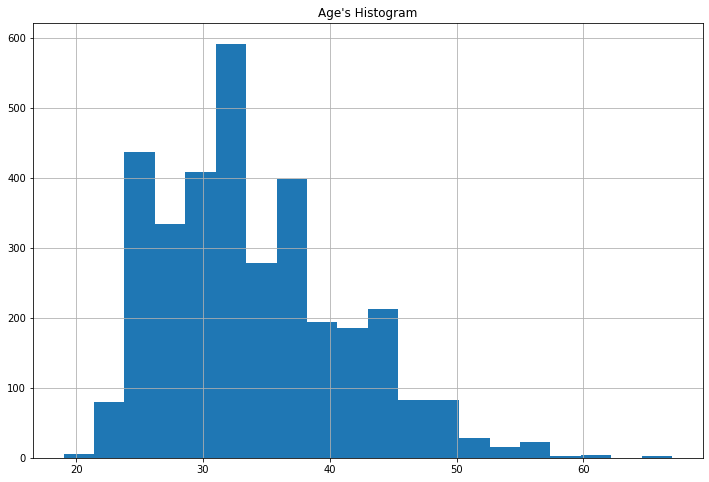

In [ ]:
#Plotting a Histogram with ages of Raw dataset
fig, ax = plt.subplots()

raw['Age'].hist(bins = 20, figsize = (12,8))
ax.set_title("Age's Histogram")
plt.show()

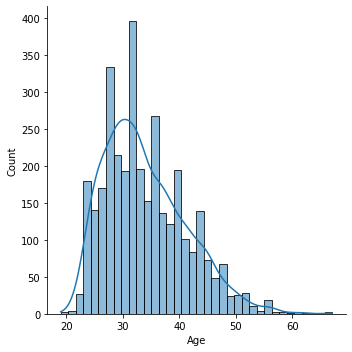

In [ ]:
sns.displot(raw, x = 'Age', kde = True)
plt.show()

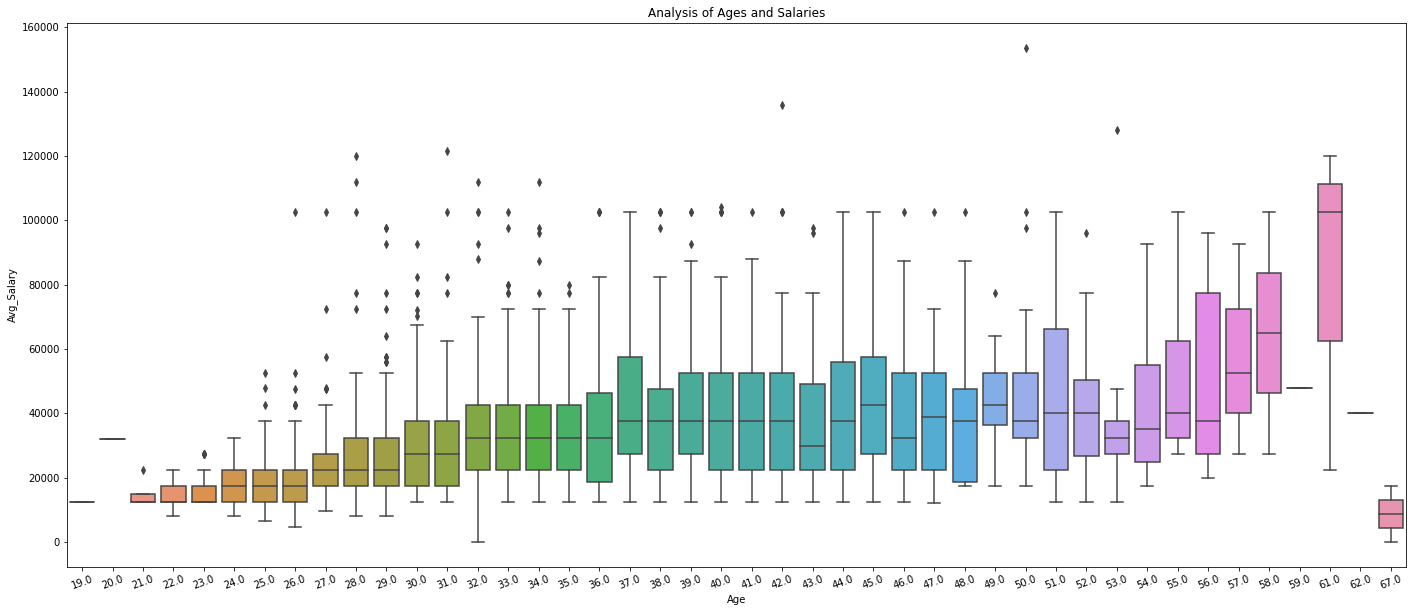

In [ ]:
##Plotting a visual analysis of ages and salaries
plt.figure(figsize = (24, 10))

sns.boxplot(x='Age', y = 'Avg_Salary', data= raw)

plt.title("Analysis of Ages and Salaries");
plt.xticks(rotation=20)
plt.show()

After this small Exploratory Data Analysis and Visualization, let's create a subset just to take a look a specific information.


As we told before, the average age of this subset will be increased by 20 years. For that it is necessary to create one column with this information.

 

In [ ]:
# building the column 
new_age_avg = round(raw['Age'].mean() + 20, 0)
new_age_avg

54.0

In [ ]:
#Inserting a new column called 'Cutting Age' in the dataset
raw.insert(loc=1, column='Cutting_Age', value=new_age_avg)
raw.head()

,ID,Cutting_Age,Employment_Status,Employment_Status_Aggregated,Work_as_Contractor_12m,Work_as_Perm,Residence_Country,Residence_District,Residence_District_Aggregated,Work_Company_Country,Work_Company_Continent,Work_Company_PT_International,Work_Company_PT_District,Work_Company_PT_District_Aggregated,Remote_Working_Current,Remote_Working_Current_Flexible_Office_Days,Remote_Working_due_to_Covid,Job_Remote_or_Office,Remote_Work_Opinion,Job_Role_Original,Job_Role_Other,Job_Role,Employer_Industry,Employer_Industry_Other,Employer_Org_Type,Employer_Org_Type_Other,Employer_Size,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,Language_Ruby,Language_Swift,Language_Objective-C,...,Perm_GAS_High_Limit,Avg_Salary,Salary_Change,Salary_Fairness,Changing_Jobs_next_6_months,Job_Motivator_Work_life_balance,Job_Motivator_Compensation_and_benefits,Job_Motivator_Training/Development_programs_at_work,Job_Motivator_Career_growth_opportunities,Job_Motivator_Remote_working,Job_Motivator_Flexible_schedule,Job_Motivator_Company_culture,Job_Motivator_The_technologies_I'm_working_with,Job_Motivator_Versatility/Variety_of_projects,Job_Motivator_Freedom_to_choose_the_clients_and/or_projects,Job_Motivator_Being_autonomous_at_work,Job_Motivator_How_widely_used_or_impactful_the_product/service_I_work_on_is,Job_Motivator_Environmentally_friendly/responsible_work_practice,Job_Perk_Meals_allowance/Company_provided_meals_or_snacks,Job_Perk_Transportation_benefit,Job_Perk_Health_benefits,Job_Perk_Fitness_or_wellness_benefit_(ex._gym_membership),Job_Perk_Computer/_Office_equipment_allowance,Job_Perk_Professional_development_sponsorship,Job_Perk_Annual_bonus,Job_Perk_Long-term_leave,Job_Perk_Parental_leave,Job_Perk_Stock_options_or_shares,Job_Perk_Education_sponsorship,Job_Perk_Child_care,Citizenship,Birth_Year,Age,Gender,English_Level,Way_Into_Tech,Way_Into_Tech_Other,Education_Level,Working_Experience,Working_Experience_Aggregated
0,1,54.0,Employed full-time,Permanent Employee,1.0,NaN,Portugal,Santarém,Centre,Portugal,Europe,Portugal,Lisboa,Lisbon Metropolitan Area,"Yes, fully remote",NaN,Working remote because of Covid-19,Full Office Job,6.0,Technical Team Leader,NaN,Technical Team Leader,Financial and banking,NaN,Corporate,NaN,1000 - 4.999 employees,NaN,NaN,SQL,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35000.0,32500,Hasn't changed,4,4.0,6,7,6,7,7,7,4,4,5,1,4,5,5,1,7,7,3,7,4,5,4,6,2,7,7,Portuguese,1984.0,37.0,Male,Full professional proficiency,University,NaN,NaN,More than 9 years,6+ years
1,2,54.0,Employed full-time,Permanent Employee,0.0,NaN,Portugal,Coimbra,Centre,Portugal,Europe,Portugal,Coimbra,Centre,"Yes, fully remote",NaN,Working remote because of Covid-19,Full Office Job,7.0,Full-Stack Developer,NaN,Full-Stack Developer,Software development - other,NaN,SME - Small or Medium Enterprise (personnel <250),NaN,Less than 10 employees,JavaScript,NaN,SQL,NaN,NaN,NaN,PHP,NaN,NaN,NaN,NaN,NaN,NaN,...,15000.0,12500,Hasn't changed,4,3.0,5,6,5,6,7,7,6,6,6,4,5,3,4,4,4,6,4,7,6,6,5,6,3,6,5,Portuguese,1976.0,45.0,Male,Full professional proficiency,Self-taught,NaN,NaN,More than 9 years,6+ years
2,3,54.0,Working as a Contractor/Freelancer,Contractor,NaN,1.0,Portugal,Porto,Porto Metropolitan Area,No specific country,NaN,International,NaN,NaN,"Yes, fully remote",NaN,Working remote because of Covid-19,Full Office Job,4.0,Full-Stack Developer,NaN,Full-Stack Developer,Web development or design,NaN,Startup (new business venture),NaN,Less than 10 employees,JavaScript,NaN,SQL,Java,NaN,NaN,PHP,C++,NaN,NaN,NaN,Swift,NaN,...,NaN,16000,Decreased more than 15%,3,5.0,6,5,5,6,4,4,5,5,6,5,5,6,7,3,5,6,4,6,6,6,6,4,5,5,3,Portuguese,1986.0,35.0,Male,Full professional proficiency,University,NaN,Bachelor degree,Between 1 - 3 years,0 - 3 years
3,4,54.0,Employed full-time,Permanent Employee,1.0,NaN,Portugal,Açores,Azores and Madeira,Portugal,Europe,Portugal,Açores,Azores and Madeira,

In [ ]:
#let's check if the new column was built correctly
raw.groupby(by='Job_Role')['Cutting_Age'].value_counts()

Job_Role                            Cutting_Age
Back-End Developer                  54.0           511
Business Applications (BI/CRM/ERP)  54.0            85
CTO                                 54.0           105
Computer & Network Security         54.0            25
Data Scientist/Data Engineer        54.0           160
DevOps Engineer                     54.0            82
Front-End Developer                 54.0           299
Full-Stack Developer                54.0           846
Maintenance & Support               54.0            63
Mobile Apps Developer               54.0           126
Product Owner/Product Manager       54.0           147
Project Manager                     54.0           236
Quality Assurance/Testing           54.0            79
Scrum Master                        54.0            43
Solutions Architect                 54.0            94
SysAdmin Engineer                   54.0            34
Technical Team Leader               54.0           316
UX/UI Designer   

In [ ]:
raw['Age'].isnull().sum()

6

In [ ]:
#Once there are some null value at 'Age' column, let's use the average age to solve this.
raw.loc[(raw['Age'].isnull() == True), 'Age'] = raw['Age'].mean()

In [ ]:
#Creating the subset 
raw_a = raw[['Age','Avg_Salary', 'Gender','Cutting_Age', 'Job_Role','Working_Experience']]
raw_a

,Age,Avg_Salary,Gender,Cutting_Age,Job_Role,Working_Experience
0,37.0,32500,Male,54.0,Technical Team Leader,More than 9 years
1,45.0,12500,Male,54.0,Full-Stack Developer,More than 9 years
2,35.0,16000,Male,54.0,Full-Stack Developer,Between 1 - 3 years
3,46.0,17500,Male,54.0,Product Owner/Product Manager,More than 9 years
4,32.0,17500,Male,54.0,Back-End Developer,Between 6 - 9 years
...,...,...,...,...,...,...
3366,29.0,17500,Male,54.0,Full-Stack Developer,Between 3 - 6 years
3367,33.0,27500,Male,54.0,Quality Assurance/Testing,Between 3 - 6 years
3368,39.0,32500,Male,54.0,Front-End Developer,Between 6 - 9 years
3369,33.0,22500,Male,54.0,Front-End Developer,Between 3 - 6 years


In [ ]:
round(raw_a.describe().T, 0)

,count,mean,std,min,25%,50%,75%,max
Age,3371.0,34.0,7.0,19.0,28.0,33.0,38.0,67.0
Avg_Salary,3371.0,32559.0,19175.0,0.0,17500.0,27500.0,42500.0,153600.0
Cutting_Age,3371.0,54.0,0.0,54.0,54.0,54.0,54.0,54.0


Now it is necessary to create a specific dataset with professional which ages are above 54 years old

In [ ]:
raw_b = raw_a.query('Age >= 54')
raw_b.sample(10)

,Age,Avg_Salary,Gender,Cutting_Age,Job_Role,Working_Experience
3306,54.0,27500,Male,54.0,Maintenance & Support,More than 9 years
2840,55.0,102500,Male,54.0,Product Owner/Product Manager,More than 9 years
2093,56.0,47500,Male,54.0,Project Manager,Between 6 - 9 years
2580,57.0,52500,Male,54.0,Project Manager,More than 9 years
2015,56.0,82500,Male,54.0,CTO,More than 9 years
1768,56.0,27500,Male,54.0,Product Owner/Product Manager,More than 9 years
3348,54.0,92500,Male,54.0,Technical Team Leader,More than 9 years
1081,56.0,77500,Male,54.0,CTO,More than 9 years
3129,67.0,17500,Male,54.0,Full-Stack Developer,Between 1 - 3 years
2444,56.0,27500,Male,54.0,Project Manager,More than 9 years


Below we can see that in this subset there are 35 professionals with age over 54 years.

In [ ]:
raw_b.shape

(35, 6)

In [ ]:
raw_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 499 to 3362
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 35 non-null     float64
 1   Avg_Salary          35 non-null     int64  
 2   Gender              35 non-null     object 
 3   Cutting_Age         35 non-null     float64
 4   Job_Role            35 non-null     object 
 5   Working_Experience  35 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ KB


In [ ]:
round(raw_b.describe().T, 0)

,count,mean,std,min,25%,50%,75%,max
Age,35.0,57.0,3.0,54.0,55.0,56.0,58.0,67.0
Avg_Salary,35.0,51406.0,31644.0,0.0,27500.0,40000.0,80000.0,120000.0
Cutting_Age,35.0,54.0,0.0,54.0,54.0,54.0,54.0,54.0


Let's take a look at visualization at the subset raw_b

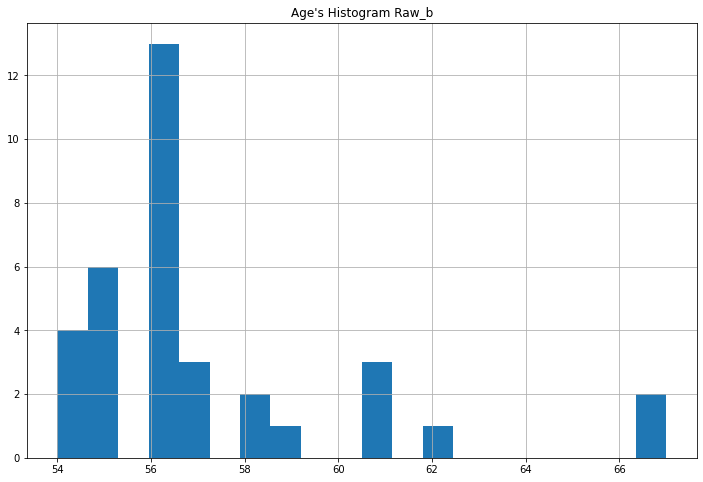

In [ ]:
#Plotting a Histogram with ages of Raw_3LA dataset
fig, ax = plt.subplots()

raw_b['Age'].hist(bins = 20, figsize = (12,8))
ax.set_title("Age's Histogram Raw_b")
plt.show()

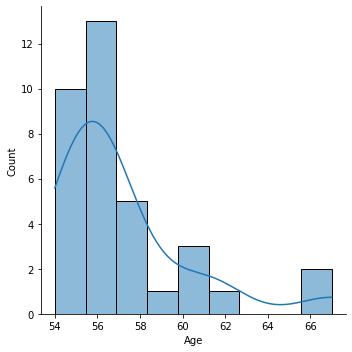

In [ ]:
sns.displot(raw_b, x = 'Age', kde = True)
plt.show()

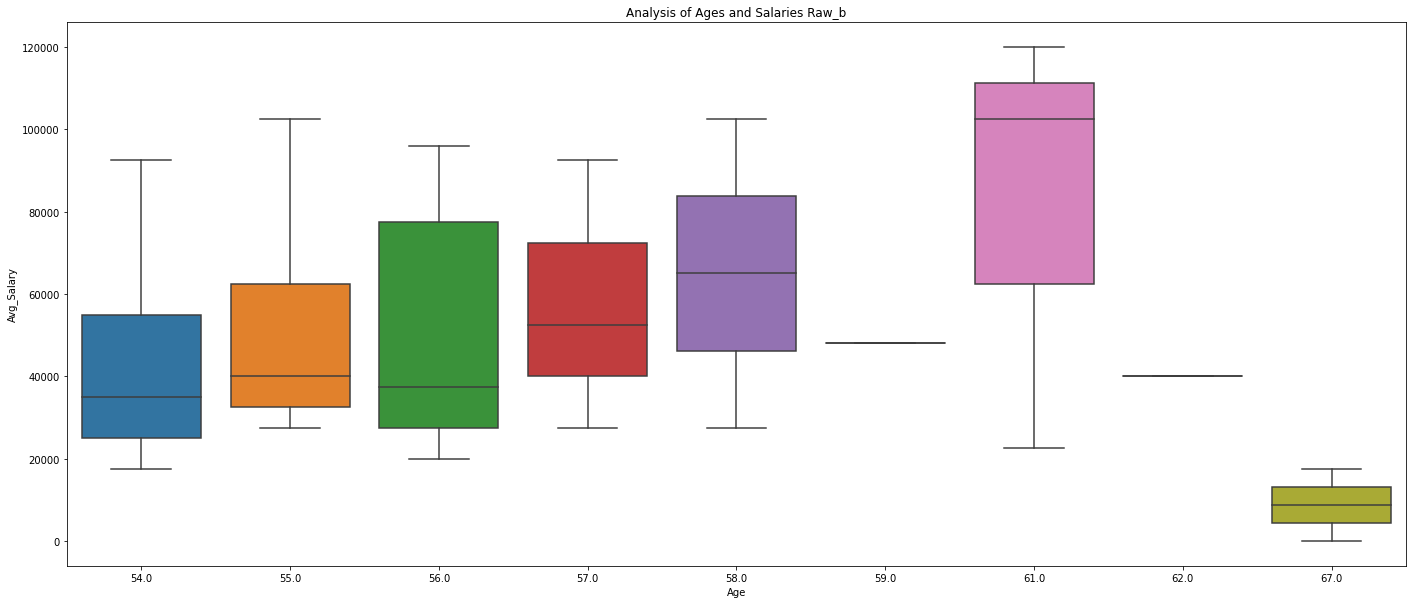

In [ ]:
##Plotting a visual analysis of ages and salaries
plt.figure(figsize = (24, 10))

sns.boxplot(x='Age', y = 'Avg_Salary', data= raw_b)

plt.title("Analysis of Ages and Salaries Raw_b");

plt.show()

In [ ]:
#Let's check the mean age by gender
round(raw_b.groupby(by='Gender')['Age'].mean(),0)

Gender
Female    56.0
Male      57.0
Name: Age, dtype: float64

In [ ]:
#Let's see a split of Gender
raw_b.groupby(by='Gender').size()

Gender
Female     4
Male      31
dtype: int64

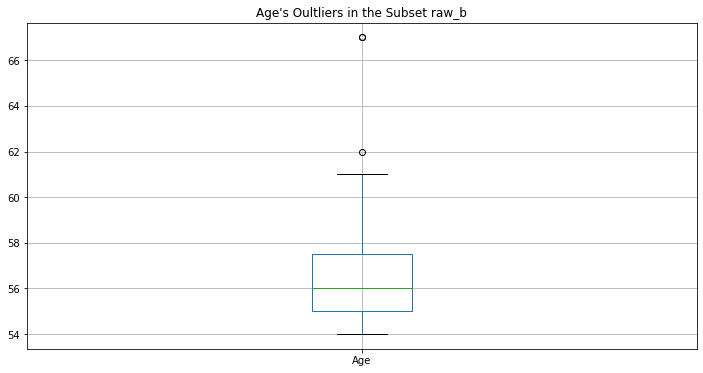

In [ ]:
#looking for outliers
fig, ax = plt.subplots()
raw_b['Age'].plot.box(grid = True, figsize = (12, 6))
ax.set_title("Age's Oultliers in the Subset raw_b")
plt.show()

As mentioned above, we know that a Machine Learning model could have bias and when identifying possible outliers within a dataset could not consider these outliers.

So, there is a risk for the candidate (tech professional) during the hiring process to be eliminated because it is age is higher than the average age plus 20 years.



**THE QUESTION TO BE ANSWERED:**

How those 35 professionals tech could facing the potential ageism??